# MA/CS 358: Final Project: Playfair Cipher - Spring 2020
*Please complete this notebook by filling in the code cells as indicated.*

Double-click into this cell, type your name, and run the cell to finalize the changes.

**Name:** -----

## 0. Run The Cell Below Everytime You Log In

To get you started, run the cell below to load the autograder and toolkit for the final project. Every function we've used in the course should be available to you in the toolkit.

In [ ]:
import otter
grader = otter.Notebook('tests')
from final_toolkit import *

# 1. The Polybius Square (14 total points)

This cipher uses a 5x5 square of characters as part of the encryption scheme. The default Polybius square is in the form:

||||||
|---|---|---|---|---|
|A|B|C|D|E|
|F|G|H|I/J|K|
|L|M|N|O|P|
|Q|R|S|T|U|
|V|W|X|Y|Z|

A key could be used to reorder the alphabet in the square, with the letters (without duplicates) of the key being placed at the beginning with the rest of the alphabet following it in regular order. For example, the key phrase `polybius cipher` would lead to the reordered square below.

||||||
|---|---|---|---|---|
|P|O|L|Y|B|
|I/J|U|S|C|H|
|E|R|A|D|F|
|G|K|M|N|Q|
|T|V|W|X|Z|

For this assignment, represent the polybius square using a list of lists. For example, the default and key word polybius squares would be the objects:

In [ ]:
default_square = [ ['A', 'B', 'C', 'D', 'E'],
                   ['F', 'G', 'H', 'I', 'K'],
                   ['L', 'M', 'N', 'O', 'P'],
                   ['Q', 'R', 'S', 'T', 'U'],
                   ['V', 'W', 'X', 'Y', 'Z'] ]

keyword_square = [ ['P', 'O', 'L', 'Y', 'B'],
                   ['I', 'U', 'S', 'C', 'H'],
                   ['E', 'R', 'A', 'D', 'F'],
                   ['G', 'K', 'M', 'N', 'Q'],
                   ['T', 'V', 'W', 'X', 'Z'] ]

These lists will be used in the sample test cases in the problems below.

Note that when creating these objects, only the character `I` was used, not `I/J`. For this assignment, both `I` and `J` should be treated as the character `I`. This will create some odd plaintext messages when deciphering, but humans are good at reading `I`'s as `J`'s when needed. Now stop and give me `10 Iumping Iacks`!

## Part A: Creating the Square (4 pts)

Write a function that creates the list of lists that represents the Polybius Square. It should be capable of taking in a key word to re-order the characters, but if one is not provided it should revert to the default square described above.

**Criteria:**
1. The function must be named `polybius_square_gen` exactly
2. The function must have exactly 1 input arguments:
   * `key` (str, optional): the value for the key word to be used to generate the list of lists. Should default to `'ABCDEFGHIKLMNOPQRSTUVWXYZ'` (notice no `J`)
3. The function must return a `list` object that contains 5 sub-lists, one for each row in the square. Each sublist should contain 5 elements, each a single character string.
4. Any `J`'s included in a keyword should be replaced with `I`'s before creating the square
5. The keyword should be cleaned in case it uses lower-case letters or symbols.

**Sample Test Cases**:
```
>>> polybius_square_gen()
[['A', 'B', 'C', 'D', 'E'], ['F', 'G', 'H', 'I', 'K'], ['L', 'M', 'N', 'O', 'P'], ['Q', 'R', 'S', 'T', 'U'], ['V', 'W', 'X', 'Y', 'Z']]


>>> polybius_square_gen( 'Polybius Cipher' )
[['P', 'O', 'L', 'Y', 'B'], ['I', 'U', 'S', 'C', 'H'], ['E', 'R', 'A', 'D', 'F'], ['G', 'K', 'M', 'N', 'Q'], ['T', 'V', 'W', 'X', 'Z']]

>>> polybius_square_gen( key = 'Long Jump' )
[['L', 'O', 'N', 'G', 'I'], ['U', 'M', 'P', 'A', 'B'], ['C', 'D', 'E', 'F', 'H'], ['K', 'Q', 'R', 'S', 'T'], ['V', 'W', 'X', 'Y', 'Z']]

```

In [ ]:
def polybius_square_gen( key = 'ABCDEFGHIKLMNOPQRSTUVWXYZ'):
    
    square = [[],[],[],[],[]]

    
    return square

In [ ]:
### Running this cell will check your answer for Question 1a
grader.check('final-polybius-1a')

## Part B: Accessing Characters (2 pts)

For this cipher, it will be helpful to be able to provide a row and column number and determine which character is located there. Write a function that takes in the row and column number and returns the character located there. The first row and column should be considered to be row 1 and column 1 respectively.

**Criteria:**
1. The function must be named `polybius_square_character` exactly
2. The function must have exactly 3 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `row` (int): the value for the row
   * `col` (int): the value for the column
3. The function must return a `str` object that contains a single character

**Hint:** This should be a _very_ short function. If you're good you can get by with _just_ a return statement! In fact, you almost don't need a function for this, but it's helpful to have a function name that can be called to perform this operation.

**Sample Test Cases**:
```
>>> polybius_square_character( default_square, 1, 2 )
'B'

>>> polybius_square_character( keyword_square, 5, 4 )
'X'
```

In [ ]:
def polybius_square_character( square, row, col ):
    

In [ ]:
### Running this cell will check your answer for Question 1b
grader.check('final-polybius-1b')

## Part C: Determining Row Number (4 pts)

For this cipher, it will be helpful to know in which row and column a given character can be located. Write a function that takes in a character and returns the row number where it's located.

**Criteria:**
1. The function must be named `polybius_square_row` exactly
2. The function must have exactly 2 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `letter` (str): the letter whose row number is being determined
3. The function must return a `int` object that represents the row number

**Hint:** Iterate over the possible row and column numbers for the polybius square and check to see if the current row/column number matches the passed in character. If it is, return the value for the row. If not, keep going. You're guaranteed to find it evenually! Don't forget, the rows in the Polybius square start at 1, while in a list the first element is at index 0.

**Sample Test Cases**:
```
>>> polybius_square_row( default_square, 'A' )
1

>>> polybius_square_row( default_square, 'P' )
3

>>> polybius_square_row( keyword_square, 'A' )
3
```

In [ ]:
def polybius_square_row( square, letter ):
    

In [ ]:
### Running this cell will check your answer for Question 1c
grader.check('final-polybius-1c')

## Part D: Determining Column Number (4 pts)

For this cipher, it will be helpful to know in which row and column a given character can be located. Write a function that takes in a character and returns the column number where it's located.

**Criteria:**
1. The function must be named `polybius_square_col` exactly
2. The function must have exactly 2 input arguments:
   * `square` (list): the list of lists that represents the polybius square
   * `letter` (str): the letter whose column number is being determined
3. The function must return a `int` object that represents the column number

**Hint:** Iterate over the possible row and column numbers for the polybius square and check to see if the current row/column number matches the passed in character. If it is, return the value for the column. If not, keep going. You're guaranteed to find it evenually! Don't forget, the columns in the Polybius square start at 1, while in a list the first element is at index 0.

**Sample Test Cases**:
```
>>> polybius_square_col( default_square, 'A' )
1

>>> polybius_square_col( default_square, 'P' )
5

>>> polybius_square_col( keyword_square, 'K' )
2
```

In [ ]:
def polybius_square_col( square, letter ):
    

In [ ]:
### Running this cell will check your answer for Question 1d
grader.check('final-polybius-1d')

# 2. Cleaning the Message (8 pts)

When encrypting a message, the Playfair Cipher selects two plaintext letters and uses the Polybius square to determine which 2 ciphertext letters to replace them with. However, the algorithm uses requires that the following conditions be met:
   * There should not be any `J`'s in your message. They should replaced with `I`'s
   * The two letters selected must not be the same letter. If they are, insert an 'X' after the first of the repeating letter. Note, this does not neccesarily mean you need to replace ALL repeated letters, but only those that would be selected together as a pair.
   * The message must be even in length so letters can always be taken in pairs. If after splitting repeating letters 
   
Write a function to prepare messages to be used with the Playfair cipher.

**Criteria:**
1. The function must be named `playfair_textclean` exactly
2. The function must have exactly 1 input arguments:
   * `text` (str): the message that will be prepare for encryption with the Playfair cipher.
3. The function must return a `str` object that represents the prepared text.

**Hint:** Use a `while` loop to iterate over the indices of the string `text`. If you use a `for` loop, it will use the `len(text)` that was computed at the start of the loop and not account of any changes to the length that inserting an `X` might cause. A `while` loop will recompute `len(text)` every time it starts the loop over, allowing you to account for any changes in length in realtime.

**Sample Test Cases**:
```
>>> playfair_textclean( 'HEY' )
'HEYX'

>>> playfair_textclean( 'Jump' )
'IUMP'

>>> playfair_textclean( 'Hide the gold in the tree stump' )
'HIDETHEGOLDINTHETREXESTUMP'

>>> playfair_textclean( 'mississippi' )
'MISXSISXSIPXPI'
```

In [ ]:
def playfair_textclean( text ):
    

In [ ]:
### Running this cell will check your answer for Question 2
grader.check('final-playfair-2')

# 3. Playfair Encryption and Decryption (12 pts)

Now that you have all the needed pieces to create the key and prepare the message, it's time to program the encryption and decryption processes. Remember the 3 rules for encryption:

1. **If the letters appear on the same row of your table**, replace them with the letters to their immediate right respectively (wrapping around to the left side of the row if a letter in the original pair was on the right side of the row).
2. **If the letters appear on the same column of your table**, replace them with the letters immediately below respectively (wrapping around to the top side of the column if a letter in the original pair was on the bottom side of the column).
3. **If the letters are not on the same row or column**, replace them with the letters on the same row respectively but at the other pair of corners of the rectangle defined by the original pair. The order is important – the first letter of the encrypted pair is the one that lies on the same row as the first letter of the plaintext pair.

For decryption, it's the same rules but you move to the left and up in the table, instead of right and down. Swapping works the same way.

**Criteria:**
1. The function must be named `playfair` exactly
2. The function must have exactly 3 input arguments:
   * `text` (str): the message that will be encrypted or decrypted
   * `key` (str, optional): the key that will be used to encrypt or decrypt the message. Should default to `'ABCDEFGHIKLMNOPQRSTUVWXYZ'` (notice no `J`)
   * `encipher` (bool, optional): Controls if the function will encipher or decipher the string passed to `text`. `True` should trigger enciphering, `False` should trigger deciphering. Should default to `True`. 
3. The function must return a `str` object that represents the encrypted or decrypted text.

**Sample Test Cases**:
```
>>> playfair( 'test' )
'UDTU'

>>> playfair( 'test', 'secret' )
'SCES'

>>> playfair( 'Hide the gold in the tree stump', 'playfair example')
'BMODZ BXDNA BEKUD MUIXM MOUVI F'

>>> playfair( 'BMODZ BXDNA BEKUD MUIXM MOUVI F', 'playfair example', False)
'hidethegoldinthetrexestump'

>>> playfair( 'FQVHD TAZQO EPEPS Y', 'decipher me', False)
'goodiobyoudiditx'
```

In [ ]:
def playfair( text, key='ABCDEFGHIKLMNOPQRSTUVWXYZ', encipher = True):
    
    text = playfair_textclean(text)
    square = polybius_square_gen(key)


In [ ]:
### Running this cell will check your answer for Question 3
grader.check('final-playfair-3')

# 4. Analysis of Ciphertext

There is a file included with this notebook that contains the first chapter of Pride and Prejudice. The questions below will ask you to analyze a ciphertext that uses this chapter as the plaintext. Each question will ask you to replace `...`'s in a code cell with your answer, either a multiple choice response (`'A'`, `'B'`, etc) or a free response. These responses will only be graded once you've submitted your assignment, so make sure you are certain of your answers before submitting.

## Part A: Character Frequency (2 pts)
Run the cell below to generate a bar chart of the single character frequencies in the ciphertext created using the Playfair cipher and the key word `Jane Austen`. The bar char should be prefilled, but if you need to create it again you may need to run the cell twice for the bar chart to display.

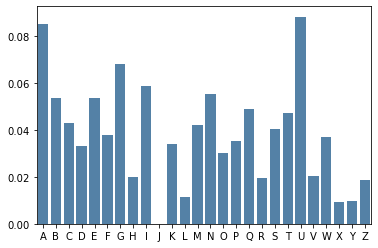

In [13]:
from seaborn import barplot

with open('pride-prejudice-chapter-01.txt') as f:
    plaintext = f.read()

ciphertext = playfair( plaintext, 'Jane Austen' )
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
values = character_frequency( ciphertext )

barplot(labels, values, color='steelblue');

When considering the bar chart, (ignoring the lack of a `J`) how does this chart compare to other ciphers we've studied in this course?
* [A] Most similar to the Multiplicative cipher
* [B] Most similar to the Autokey Cipher
* [C] Most similar to the Vigenere Cipher
* [D] Most similar to the Affine Cipher
* [E] Not like any other cipher we've seen

Replace the `...` with the letter of your answer. Use the box below to provide any written explanation to support your answer.

In [ ]:
# Your answer should be one of the following strings 'A', 'B', 'C', 'D', 'E'
analysis_q1 = '...'

*click into this box and type your written explanation*

## Part B: Index of Coincidence (2 pts)

The index of coincidence for this passage is:

In [10]:
index_of_coincidence( ciphertext )

0.05051117586389297

When considering the index of coincidence, how does this value compare to other ciphers we've studied in this course?
* [A] Similar to a polyalphabetic cipher, but a little smaller than usual
* [B] Similar to a polyalphabetic cipher, but a little larger than usual
* [C] Similar to a monoalphabetic cipher, but a little smaller than usual
* [D] Similar to a monoalphabetic cipher, but a little larger than usual
* [E] Not like any other cipher we've seen

Replace the `...` with the letter of your answer. Use the box below to provide any written explanation to support your answer.

In [ ]:
# Your answer should be one of the following strings 'A', 'B', 'C', 'D', 'E'
analysis_q2 = '...'

*click into this box and type your written explanation*

## Part C: Number of Possible Keys (2 pts)

Given the criteria for the key (the key is the 5x5 Polybius square, not the key word used to help generate it), how many possible keys are there for this cipher? You can calculate your answer if you'd like (e.g. `analysis_q3 = 3 * 5`) instead of provided a pre-computed answer ( `analysis_q3 = 15` ). Your answer should compute to be an integer. Use the box below to provide any written explanation to support your answer.

In [ ]:
# Your answer should be an integer
analysis_q3 = ...

*click into this box and type your written explanation*

# Submitting Your Work

1. Save this notebook using the save icon
2. In the File Browser to the left, right click on this file (`spring2020-final-playfair.ipynb`) and download it to your computer as a `.ipynb` file
3. Submit the `spring2020-final-playfair.ipynb` file to Gradescope via the Canvas Assignment.